In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

from GenerateInput import generate_input
from models import GameOfLifeModel, ContinuousGameOfLife3x3

Visualizing the continuous model for the 3x3 game of life.  It uses two variables:
- the state of the cell
- the sum of the states of the neighbouring cells

and it does exactly what is shown in the figure below

In [2]:
around_cell_possible_values = np.arange(8, -0.00001, -0.02)
cell_possible_values = np.arange(0,1.00001,0.01)

around_cell = [list(around_cell_possible_values)]*len(cell_possible_values)
cell = [list(cell_possible_values)] * len(around_cell_possible_values)

around_cell = np.array(around_cell)
around_cell = np.transpose(around_cell)
cell = np.array(cell)

In [3]:
around_cell = tf.constant(around_cell)
cell = tf.constant(cell)


x1 = tf.math.maximum(4-around_cell,0)
x2 = tf.math.maximum((around_cell + cell)-2,0)
x3 = tf.math.minimum(x1, x2)
x4 = tf.math.minimum(x3,1)


The colour indicates the status of the cell for the next step


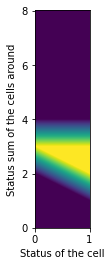

In [4]:
plt.figure(figsize=(2,4))
plt.imshow(x4, vmin=0, vmax=1)

plt.yticks([401,301, 201, 101, 0], [0,2,4,6, 8])
plt.xticks([0,101], [0,1])
plt.xlabel('Status of the cell')
plt.ylabel('Status sum of the cells around')

print('The colour indicates the status of the cell for the next step')

In [5]:
# Initializing the general model, with the 3x3 model created above
model_3x3 = ContinuousGameOfLife3x3()
input_3x3 = tf.keras.layers.Input(shape=(3,3))
model_3x3(input_3x3)
game = GameOfLifeModel((10,10), model_3x3)


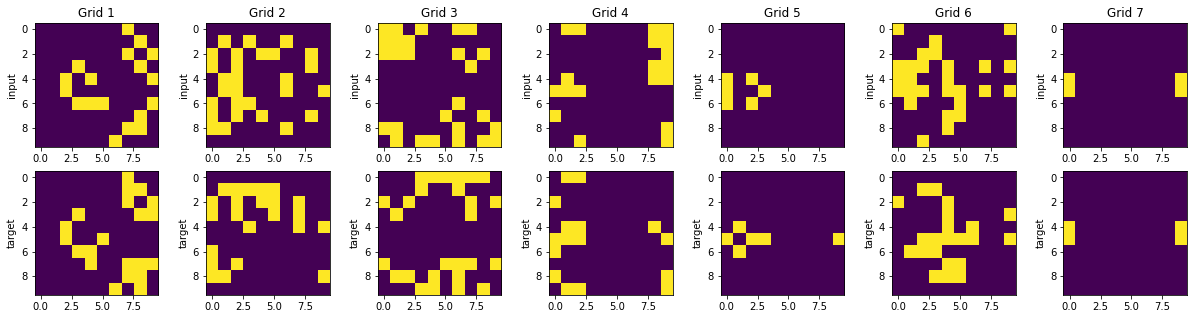

In [6]:
# generating some inputs and targets for the general mode

x, y = generate_input(trials=8, grid_shape=(10,10),steps_before_generating_output=2)


plt.figure(figsize=(3*len(x), 5))
for i in range(len(x)):
    plt.subplot(2, len(x), i+1)
    plt.title('Grid ' + str(i+1))
    plt.imshow(x[i])
    plt.ylabel('input')
    plt.subplot(2, len(x), len(x)+i+1)
    plt.imshow(y[i])
    plt.ylabel('target')    

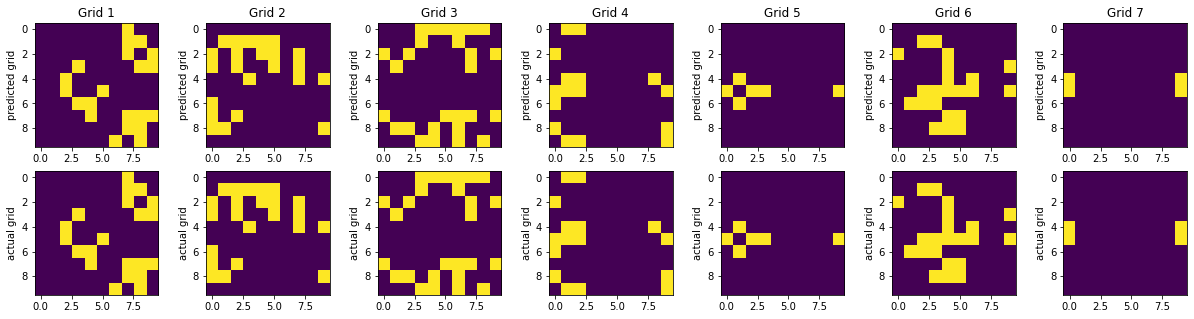

In [7]:
# checking that the general model actually works
y_pred = game(x)

plt.figure(figsize=(3*len(x), 5))
for i in range(len(y)):
    plt.subplot(2, len(y), i+1)
    plt.title('Grid ' + str(i+1))
    plt.imshow(y_pred[i])
    plt.ylabel('predicted grid')
    plt.subplot(2, len(y), len(y)+i+1)
    plt.imshow(y[i])
    plt.ylabel('actual grid')